## Energy Burned Data EDA

This notebook focus on exploring the Energy dataset exported from Apple Watch, including  
1. **Understand the data** -- Seperate basal energy and active energy records; Understand the level of the record and remove aggregated or third-party record;  
2. **Analyze and visualize the data** -- Analyze the trend of basal energy burned and active energy burned; Visualize the hourly and weekday-level patterns.

### Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energy_df = pd.read_csv('energy.csv', parse_dates = [3,4,5])
energy_df = energy_df[energy_df['startDate'] > '2019-08-30']
energy_df.head()

,type,sourceName,unit,creationDate,startDate,endDate,value
3,HKQuantityTypeIdentifierBasalEnergyBurned,Yu’s Apple Watch,kcal,2019-08-30 12:09:15-08:00,2019-08-30 07:25:27-08:00,2019-08-30 07:40:23-08:00,16.512
4,HKQuantityTypeIdentifierBasalEnergyBurned,Yu’s Apple Watch,kcal,2019-08-30 12:09:15-08:00,2019-08-30 07:40:23-08:00,2019-08-30 07:55:22-08:00,15.372
5,HKQuantityTypeIdentifierBasalEnergyBurned,Yu’s Apple Watch,kcal,2019-08-30 12:09:15-08:00,2019-08-30 07:55:22-08:00,2019-08-30 08:10:20-08:00,16.325
6,HKQuantityTypeIdentifierBasalEnergyBurned,Yu’s Apple Watch,kcal,2019-08-30 12:09:15-08:00,2019-08-30 08:10:20-08:00,2019-08-30 08:25:29-08:00,16.162
7,HKQuantityTypeIdentifierBasalEnergyBurned,Yu’s Apple Watch,kcal,2019-08-30 12:09:15-08:00,2019-08-30 08:25:29-08:00,2019-08-30 08:25:49-08:00,0.390


In [3]:
energy_df.unit.unique()

array(['kcal'], dtype=object)

In [4]:
energy_df.type.unique()

array(['HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned'], dtype=object)

In [5]:
energy_df = energy_df.iloc[:,[0,3,4,5,6]]

In [6]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342998 entries, 3 to 343075
Data columns (total 5 columns):
type            342998 non-null object
creationDate    342998 non-null datetime64[ns, pytz.FixedOffset(-480)]
startDate       342998 non-null datetime64[ns, pytz.FixedOffset(-480)]
endDate         342998 non-null datetime64[ns, pytz.FixedOffset(-480)]
value           342998 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(-480)](3), float64(1), object(1)
memory usage: 15.7+ MB


In [7]:
energy_df.describe()

,value
count,342998.000000
mean,1.104275
std,15.388545
min,0.005000
25%,0.068000
50%,0.180000
75%,0.279000
max,1284.000000


In [8]:
energy_df.groupby('type')['value'].count()

type
HKQuantityTypeIdentifierActiveEnergyBurned    241944
HKQuantityTypeIdentifierBasalEnergyBurned     101054
Name: value, dtype: int64

### Q1: What is the level of the data? How is record time interval distributed? 

**Basal energy burned** records typicall have a shorter time interval (time interval = end date - start date), with a median of 3 seconds. But the data has a very long right tail...  
**Active energy burned** records time interval mostly center around 10s seconds (10/20/30/40/50/60...), with a median at 41 seconds.

In [9]:
energy_df['time_interval'] = energy_df['endDate'] - energy_df['startDate']
energy_df['time_interval'].describe()

count                    342998
mean     0 days 00:01:08.961956
std      0 days 00:03:15.079378
min             0 days 00:00:00
25%             0 days 00:00:03
50%             0 days 00:00:21
75%             0 days 00:01:01
max             0 days 01:00:00
Name: time_interval, dtype: object

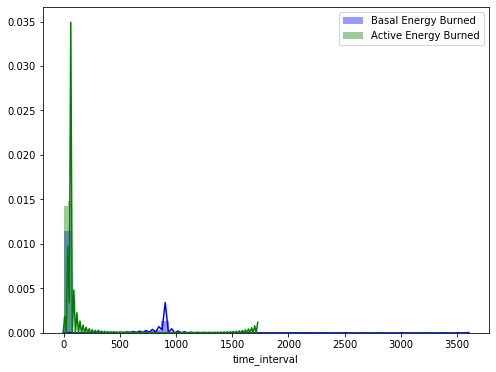

In [10]:
# when plotting all the time-intervals, it's super right-skewed with very long time intervals
fig = plt.figure(figsize=(8, 6))
ax1 = sns.distplot(energy_df[energy_df['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned']['time_interval'] / 
                   np.timedelta64(1,'s'),
                  color = 'b',
                  label = 'Basal Energy Burned')
ax1.legend (loc = 0)
ax2 = sns.distplot(energy_df[energy_df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']['time_interval'] / 
                   np.timedelta64(1,'s'),
                  color = 'g',
                  label = 'Active Energy Burned')
ax2.legend (loc = 1)
plt.show()

In [11]:
energy_df['time_interval_perc_rank'] = energy_df.groupby('type')['time_interval'].rank(pct=True, ascending=True)
energy_df.head()

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank
3,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:25:27-08:00,2019-08-30 07:40:23-08:00,16.512,00:14:56,0.916396
4,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:40:23-08:00,2019-08-30 07:55:22-08:00,15.372,00:14:59,0.963421
5,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:55:22-08:00,2019-08-30 08:10:20-08:00,16.325,00:14:58,0.933224
6,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:10:20-08:00,2019-08-30 08:25:29-08:00,16.162,00:15:09,0.988373
7,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:25:29-08:00,2019-08-30 08:25:49-08:00,0.390,00:00:20,0.709329


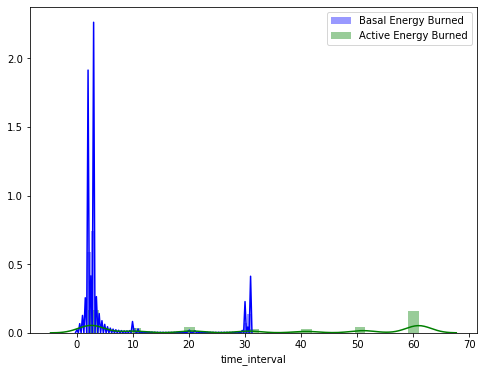

In [12]:
# let's plot only first 80% time interval in both groups
# seems like most of the time interval of basal energy burned center around 3s
# while the active energy burned records center around 10/20/30/... 
energy_time_interval_plot = energy_df[energy_df['time_interval_perc_rank'] <= 0.8]

fig = plt.figure(figsize=(8, 6))
ax1 = sns.distplot(energy_time_interval_plot[energy_time_interval_plot['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned']['time_interval'] / 
                   np.timedelta64(1,'s'),
                  color = 'b',
                  label = 'Basal Energy Burned')
ax1.legend (loc = 0)
ax2 = sns.distplot(energy_time_interval_plot[energy_time_interval_plot['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']['time_interval'] / 
                   np.timedelta64(1,'s'),
                  color = 'g',
                  label = 'Active Energy Burned')
ax2.legend (loc = 1)
plt.show()

In [13]:
# let's look at basal energy burned only:
basal_energy_df = energy_df[energy_df['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned']
(basal_energy_df['time_interval'] / np.timedelta64(1,'s')).describe()

count    101054.000000
mean        151.402616
std         343.116150
min           0.000000
25%           2.000000
50%           3.000000
75%          30.000000
max        3600.000000
Name: time_interval, dtype: float64

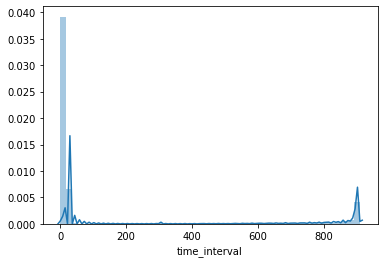

In [14]:
# looking at the <= 99% percentile records of active energy burned, we can see two spikes at each ends
sns.distplot(
    basal_energy_df[basal_energy_df['time_interval_perc_rank'] <= 0.99]['time_interval'] / 
    np.timedelta64(1,'s'))

In [15]:
# let's look at active energy burned only:
active_energy_df = energy_df[energy_df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']
(active_energy_df['time_interval'] / np.timedelta64(1,'s')).describe()

count    241944.000000
mean         34.528540
std          27.470027
min           2.000000
25%           3.000000
50%          41.000000
75%          61.000000
max        1720.000000
Name: time_interval, dtype: float64

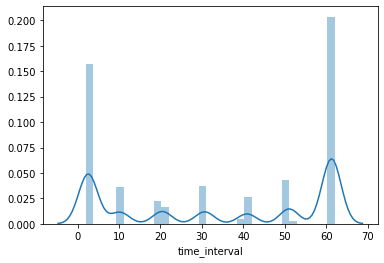

In [16]:
# looking at the <= 99% percentile records of active energy burned, we can see several peaks around 10s seconds
sns.distplot(
    active_energy_df[active_energy_df['time_interval_perc_rank'] <= 0.99]['time_interval'] / 
    np.timedelta64(1,'s'))

In [17]:
active_energy_df.head(10)

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank
101132,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:25:27-08:00,2019-08-30 07:26:28-08:00,1.007,00:01:01,0.763970
101133,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:26:28-08:00,2019-08-30 07:27:29-08:00,0.533,00:01:01,0.763970
101134,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:27:29-08:00,2019-08-30 07:28:31-08:00,0.389,00:01:02,0.948697
101135,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:28:31-08:00,2019-08-30 07:29:32-08:00,0.288,00:01:01,0.763970
101136,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:29:32-08:00,2019-08-30 07:30:03-08:00,0.135,00:00:31,0.467333
101137,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:31:37-08:00,2019-08-30 07:32:13-08:00,0.159,00:00:36,0.489460
101138,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:32:33-08:00,2019-08-30 07:33:35-08:00,0.773,00:01:02,0.948697
101139,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:33:35-08:00,2019-08-30 07:34:36-08:00,0.893,00:01:01,0.763970
101140,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:34:36-08:00,2019-08-30 07:35:37-08:00,1.831,00:01:01,0.763970
101141,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:35:37-08:00,2019-08-30 07:36:38-08:00,2.920,00:01:01,0.763970


### Question 2: Are there records with overlapping time period, and how to handle that?  

**Basal Energy Burned**: in the basal energy burned records, except those with startdate = enddate (daily total basal energy burned records generated from another health app), all the others have continous timestamp (last enddate = next startdate).  
**Active Energy Burned**: in the active energy burned records, most of them are continous, but the only exception are those inserted by 3rd party workout app (Keep), so I am removing them.  

In [18]:
# sort dataset with startDate and endDate
# seems like most of the records are continuous (last endDate = next startDate)
basal_energy_df = energy_df[energy_df['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned']
basal_energy_df = basal_energy_df.sort_values(by = ['startDate', 'endDate'])
basal_energy_df = basal_energy_df.reset_index().drop('index', axis = 1)

basal_energy_df['lastEndDate'] = basal_energy_df['endDate'].shift(1)
basal_energy_df['continuedRecord'] = (basal_energy_df['lastEndDate'] == basal_energy_df['startDate'])
basal_energy_df.loc[0,'continuedRecord'] = True # set True for the first record
basal_energy_df.head(20)

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank,lastEndDate,continuedRecord
0,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:25:27-08:00,2019-08-30 07:40:23-08:00,16.512,00:14:56,0.916396,NaT,True
1,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:40:23-08:00,2019-08-30 07:55:22-08:00,15.372,00:14:59,0.963421,2019-08-30 07:40:23-08:00,True
2,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:55:22-08:00,2019-08-30 08:10:20-08:00,16.325,00:14:58,0.933224,2019-08-30 07:55:22-08:00,True
3,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:10:20-08:00,2019-08-30 08:25:29-08:00,16.162,00:15:09,0.988373,2019-08-30 08:10:20-08:00,True
4,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:25:29-08:00,2019-08-30 08:25:49-08:00,0.390,00:00:20,0.709329,2019-08-30 08:25:29-08:00,True
5,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:25:49-08:00,2019-08-30 09:25:49-08:00,52.732,01:00:00,0.999411,2019-08-30 08:25:49-08:00,True
6,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 09:25:49-08:00,2019-08-30 09:50:23-08:00,21.583,00:24:34,0.997526,2019-08-30 09:25:49-08:00,True
7,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 09:50:23-08:00,2019-08-30 10:05:26-08:00,15.361,00:15:03,0.980599,2019-08-30 09:50:23-08:00,True
8,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 10:05:26-08:00,2019-08-30 10:20:25-08:00,13.337,00:14:59,0.963421,2019-08-30 10:05:26-08:00,True
9,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 10:20:25-08:00,2019-08-30 10:35:33-08:00,14.453,00:15:08,0.983034,2019-08-30 10:20:25-08:00,True


In [19]:
# records that do not show up as continous
# one obvious weird record is those with time_interval = 0 (startDate = endDate) -- date level records
basal_energy_df[~basal_energy_df['continuedRecord']]

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank,lastEndDate,continuedRecord
36898,HKQuantityTypeIdentifierBasalEnergyBurned,2019-12-29 21:40:56-08:00,2019-12-29 21:40:41-08:00,2019-12-29 21:40:41-08:00,1273.000,00:00:00,0.000242,2019-12-29 22:15:47-08:00,False
36899,HKQuantityTypeIdentifierBasalEnergyBurned,2019-12-29 22:32:12-08:00,2019-12-29 22:15:47-08:00,2019-12-29 22:30:57-08:00,15.041,00:15:10,0.991722,2019-12-29 21:40:41-08:00,False
38625,HKQuantityTypeIdentifierBasalEnergyBurned,2019-12-30 22:43:17-08:00,2019-12-30 22:43:17-08:00,2019-12-30 22:43:17-08:00,1273.000,00:00:00,0.000242,2019-12-30 23:33:58-08:00,False
38626,HKQuantityTypeIdentifierBasalEnergyBurned,2019-12-31 00:00:01-08:00,2019-12-30 23:33:58-08:00,2019-12-30 23:48:55-08:00,13.969,00:14:57,0.916535,2019-12-30 22:43:17-08:00,False
39976,HKQuantityTypeIdentifierBasalEnergyBurned,2019-12-31 23:36:03-08:00,2019-12-31 23:36:03-08:00,2019-12-31 23:36:03-08:00,1271.000,00:00:00,0.000242,2020-01-01 00:13:02-08:00,False
...,...,...,...,...,...,...,...,...,...
98243,HKQuantityTypeIdentifierBasalEnergyBurned,2020-02-20 23:53:30-08:00,2020-02-20 23:37:17-08:00,2020-02-20 23:50:32-08:00,13.932,00:13:15,0.873117,2020-02-20 23:19:09-08:00,False
99387,HKQuantityTypeIdentifierBasalEnergyBurned,2020-02-21 23:56:48-08:00,2020-02-21 23:56:48-08:00,2020-02-21 23:56:48-08:00,1272.000,00:00:00,0.000242,2020-02-22 00:00:50-08:00,False
99388,HKQuantityTypeIdentifierBasalEnergyBurned,2020-02-22 00:17:16-08:00,2020-02-22 00:00:50-08:00,2020-02-22 00:01:00-08:00,0.201,00:00:10,0.691630,2020-02-21 23:56:48-08:00,False
101006,HKQuantityTypeIdentifierBasalEnergyBurned,2020-02-22 22:55:03-08:00,2020-02-22 22:55:03-08:00,2020-02-22 22:55:03-08:00,1271.000,00:00:00,0.000242,2020-02-22 23:02:59-08:00,False


In [20]:
# lets filter out those data level records
basal_energy_df = basal_energy_df[basal_energy_df['startDate'] != basal_energy_df['endDate']]

In [21]:
# let's redo that continuous record exercise -- all continuous now!!!
basal_energy_df['lastEndDate'] = basal_energy_df['endDate'].shift(1)
basal_energy_df['continuedRecord'] = (basal_energy_df['lastEndDate'] == basal_energy_df['startDate'])
basal_energy_df.loc[0,'continuedRecord'] = True # set True for the first record
basal_energy_df[~basal_energy_df['continuedRecord']]

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank,lastEndDate,continuedRecord


In [22]:
basal_energy_df = basal_energy_df.iloc[:,0:6]
basal_energy_df.head(10)

,type,creationDate,startDate,endDate,value,time_interval
0,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:25:27-08:00,2019-08-30 07:40:23-08:00,16.512,00:14:56
1,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:40:23-08:00,2019-08-30 07:55:22-08:00,15.372,00:14:59
2,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:55:22-08:00,2019-08-30 08:10:20-08:00,16.325,00:14:58
3,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:10:20-08:00,2019-08-30 08:25:29-08:00,16.162,00:15:09
4,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:25:29-08:00,2019-08-30 08:25:49-08:00,0.390,00:00:20
5,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:25:49-08:00,2019-08-30 09:25:49-08:00,52.732,01:00:00
6,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 09:25:49-08:00,2019-08-30 09:50:23-08:00,21.583,00:24:34
7,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 09:50:23-08:00,2019-08-30 10:05:26-08:00,15.361,00:15:03
8,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 10:05:26-08:00,2019-08-30 10:20:25-08:00,13.337,00:14:59
9,HKQuantityTypeIdentifierBasalEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 10:20:25-08:00,2019-08-30 10:35:33-08:00,14.453,00:15:08


In [23]:
# Let's look at active energy burned records now
active_energy_df = energy_df[energy_df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']
active_energy_df = active_energy_df.sort_values(by = ['startDate', 'endDate'])
active_energy_df = active_energy_df.reset_index().drop('index', axis = 1)

In [24]:
# seems like many records are not continuous -- makes sense as active energy is only recorded when I am active...
active_energy_df['lastEndDate'] = active_energy_df['endDate'].shift(1)
active_energy_df['continuedRecord'] = (active_energy_df['lastEndDate'] == active_energy_df['startDate'])
active_energy_df.loc[0,'continuedRecord'] = True # set True for the first record
active_energy_df[~active_energy_df['continuedRecord']].head(20)

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank,lastEndDate,continuedRecord
5,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:31:37-08:00,2019-08-30 07:32:13-08:00,0.159,00:00:36,0.489460,2019-08-30 07:30:03-08:00,False
6,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:32:33-08:00,2019-08-30 07:33:35-08:00,0.773,00:01:02,0.948697,2019-08-30 07:32:13-08:00,False
14,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:41:14-08:00,2019-08-30 07:42:16-08:00,0.795,00:01:02,0.948697,2019-08-30 07:40:44-08:00,False
17,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:44:08-08:00,2019-08-30 07:45:09-08:00,0.193,00:01:01,0.763970,2019-08-30 07:43:27-08:00,False
18,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:45:40-08:00,2019-08-30 07:46:31-08:00,0.237,00:00:51,0.584873,2019-08-30 07:45:09-08:00,False
21,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:49:04-08:00,2019-08-30 07:50:05-08:00,0.236,00:01:01,0.763970,2019-08-30 07:48:33-08:00,False
30,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:58:36-08:00,2019-08-30 07:59:37-08:00,0.159,00:01:01,0.763970,2019-08-30 07:58:15-08:00,False
33,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:02:20-08:00,2019-08-30 08:03:22-08:00,0.215,00:01:02,0.948697,2019-08-30 08:01:39-08:00,False
49,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:18:40-08:00,2019-08-30 08:19:42-08:00,0.926,00:01:02,0.948697,2019-08-30 08:18:30-08:00,False
54,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 08:24:28-08:00,2019-08-30 08:25:29-08:00,0.233,00:01:01,0.763970,2019-08-30 08:23:47-08:00,False


In [25]:
# but what we concern more is whether the last end data is after the next start date, i.e. overlapping records
# there are 16 weird records in this cases... 
active_energy_df['overlappingRecord'] = (active_energy_df['lastEndDate'] > active_energy_df['startDate'])
active_energy_df[active_energy_df['overlappingRecord']]

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank,lastEndDate,continuedRecord,overlappingRecord
16717,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-15 19:31:41-08:00,2019-09-15 19:17:53-08:00,2019-09-15 19:31:41-08:00,61.000,00:13:48,0.999988,2019-09-15 19:18:03-08:00,False,True
16718,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-15 19:18:25-08:00,2019-09-15 19:18:03-08:00,2019-09-15 19:18:14-08:00,0.012,00:00:11,0.343311,2019-09-15 19:31:41-08:00,False,True
18235,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-16 21:19:13-08:00,2019-09-16 21:05:35-08:00,2019-09-16 21:19:13-08:00,61.000,00:13:38,0.999983,2019-09-16 21:05:40-08:00,False,True
18236,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-16 21:06:26-08:00,2019-09-16 21:05:40-08:00,2019-09-16 21:05:50-08:00,0.082,00:00:10,0.310621,2019-09-16 21:19:13-08:00,False,True
23586,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-21 22:00:45-08:00,2019-09-21 21:47:31-08:00,2019-09-21 22:00:45-08:00,49.000,00:13:14,0.999975,2019-09-21 21:47:33-08:00,False,True
23587,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-21 21:47:53-08:00,2019-09-21 21:47:33-08:00,2019-09-21 21:47:41-08:00,0.012,00:00:08,0.284801,2019-09-21 22:00:45-08:00,False,True
24820,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-22 21:16:43-08:00,2019-09-22 21:03:47-08:00,2019-09-22 21:16:43-08:00,49.000,00:12:56,0.999967,2019-09-22 21:04:17-08:00,False,True
24821,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-22 21:05:42-08:00,2019-09-22 21:04:17-08:00,2019-09-22 21:05:18-08:00,0.561,00:01:01,0.763970,2019-09-22 21:16:43-08:00,False,True
27221,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-24 22:00:22-08:00,2019-09-24 21:47:26-08:00,2019-09-24 22:00:22-08:00,49.000,00:12:56,0.999967,2019-09-24 21:47:50-08:00,False,True
27222,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-24 21:49:41-08:00,2019-09-24 21:48:20-08:00,2019-09-24 21:49:21-08:00,0.577,00:01:01,0.763970,2019-09-24 22:00:22-08:00,False,True


In [26]:
# let's take a closer look at those record by pulling its previous and next records as well
# seems like it's because some longer records being inserted between continuous records
# (those with high energy burned values)
# after looking at my app records, it turned out that those records are generated by 3rd party workout app (Keep)
# And since I am wearning App watch throughout the workout, we can remove those outliers
overlap_index = active_energy_df[active_energy_df['overlappingRecord']].index
all_overlap_index = list(set(list(overlap_index) + list(overlap_index + 1) + list(overlap_index - 1)))
active_energy_df.loc[all_overlap_index,:].sort_index()

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank,lastEndDate,continuedRecord,overlappingRecord
16716,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-15 19:18:23-08:00,2019-09-15 19:17:53-08:00,2019-09-15 19:18:03-08:00,0.045,00:00:10,0.310621,2019-09-15 19:17:53-08:00,True,False
16717,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-15 19:31:41-08:00,2019-09-15 19:17:53-08:00,2019-09-15 19:31:41-08:00,61.000,00:13:48,0.999988,2019-09-15 19:18:03-08:00,False,True
16718,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-15 19:18:25-08:00,2019-09-15 19:18:03-08:00,2019-09-15 19:18:14-08:00,0.012,00:00:11,0.343311,2019-09-15 19:31:41-08:00,False,True
16719,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-15 19:18:27-08:00,2019-09-15 19:18:14-08:00,2019-09-15 19:18:16-08:00,0.121,00:00:02,0.063130,2019-09-15 19:18:14-08:00,True,False
18234,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-16 21:06:12-08:00,2019-09-16 21:04:38-08:00,2019-09-16 21:05:40-08:00,0.182,00:01:02,0.948697,2019-09-16 21:04:38-08:00,True,False
18235,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-16 21:19:13-08:00,2019-09-16 21:05:35-08:00,2019-09-16 21:19:13-08:00,61.000,00:13:38,0.999983,2019-09-16 21:05:40-08:00,False,True
18236,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-16 21:06:26-08:00,2019-09-16 21:05:40-08:00,2019-09-16 21:05:50-08:00,0.082,00:00:10,0.310621,2019-09-16 21:19:13-08:00,False,True
18237,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-16 21:06:26-08:00,2019-09-16 21:05:50-08:00,2019-09-16 21:06:00-08:00,0.120,00:00:10,0.310621,2019-09-16 21:05:50-08:00,True,False
23585,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-21 21:47:53-08:00,2019-09-21 21:47:23-08:00,2019-09-21 21:47:33-08:00,0.045,00:00:10,0.310621,2019-09-21 21:47:23-08:00,True,False
23586,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-21 22:00:45-08:00,2019-09-21 21:47:31-08:00,2019-09-21 22:00:45-08:00,49.000,00:13:14,0.999975,2019-09-21 21:47:33-08:00,False,True


In [27]:
# to remove outliers, basically we want to skip those inserted longer interval records
active_energy_df['nextStartDate'] = active_energy_df['startDate'].shift(-1)
active_energy_df['nextEndDate'] = active_energy_df['endDate'].shift(-1)
active_energy_df['3rdPartyRecord'] = (active_energy_df['lastEndDate'] == active_energy_df['nextStartDate']) & (active_energy_df['nextEndDate'] < active_energy_df['endDate'])
active_energy_df[active_energy_df['3rdPartyRecord']]

,type,creationDate,startDate,endDate,value,time_interval,time_interval_perc_rank,lastEndDate,continuedRecord,overlappingRecord,nextStartDate,nextEndDate,3rdPartyRecord
16717,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-15 19:31:41-08:00,2019-09-15 19:17:53-08:00,2019-09-15 19:31:41-08:00,61.0,00:13:48,0.999988,2019-09-15 19:18:03-08:00,False,True,2019-09-15 19:18:03-08:00,2019-09-15 19:18:14-08:00,True
18235,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-16 21:19:13-08:00,2019-09-16 21:05:35-08:00,2019-09-16 21:19:13-08:00,61.0,00:13:38,0.999983,2019-09-16 21:05:40-08:00,False,True,2019-09-16 21:05:40-08:00,2019-09-16 21:05:50-08:00,True
23586,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-21 22:00:45-08:00,2019-09-21 21:47:31-08:00,2019-09-21 22:00:45-08:00,49.0,00:13:14,0.999975,2019-09-21 21:47:33-08:00,False,True,2019-09-21 21:47:33-08:00,2019-09-21 21:47:41-08:00,True
24820,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-22 21:16:43-08:00,2019-09-22 21:03:47-08:00,2019-09-22 21:16:43-08:00,49.0,00:12:56,0.999967,2019-09-22 21:04:17-08:00,False,True,2019-09-22 21:04:17-08:00,2019-09-22 21:05:18-08:00,True
28517,HKQuantityTypeIdentifierActiveEnergyBurned,2019-09-25 21:33:00-08:00,2019-09-25 21:20:04-08:00,2019-09-25 21:33:00-08:00,49.0,00:12:56,0.999967,2019-09-25 21:20:10-08:00,False,True,2019-09-25 21:20:10-08:00,2019-09-25 21:20:20-08:00,True
122005,HKQuantityTypeIdentifierActiveEnergyBurned,2019-12-17 00:29:44-08:00,2019-12-17 00:16:08-08:00,2019-12-17 00:29:44-08:00,59.0,00:13:36,0.999979,2019-12-17 00:16:16-08:00,False,True,2019-12-17 00:16:16-08:00,2019-12-17 00:16:19-08:00,True
123257,HKQuantityTypeIdentifierActiveEnergyBurned,2019-12-18 00:42:15-08:00,2019-12-18 00:16:01-08:00,2019-12-18 00:42:15-08:00,157.0,00:26:14,0.999996,2019-12-18 00:16:11-08:00,False,True,2019-12-18 00:16:11-08:00,2019-12-18 00:16:14-08:00,True


In [28]:
active_energy_df = active_energy_df[~active_energy_df['3rdPartyRecord']]
active_energy_df = active_energy_df.iloc[:,0:6]
active_energy_df.head()

,type,creationDate,startDate,endDate,value,time_interval
0,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:25:27-08:00,2019-08-30 07:26:28-08:00,1.007,00:01:01
1,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:26:28-08:00,2019-08-30 07:27:29-08:00,0.533,00:01:01
2,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:27:29-08:00,2019-08-30 07:28:31-08:00,0.389,00:01:02
3,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:28:31-08:00,2019-08-30 07:29:32-08:00,0.288,00:01:01
4,HKQuantityTypeIdentifierActiveEnergyBurned,2019-08-30 12:09:15-08:00,2019-08-30 07:29:32-08:00,2019-08-30 07:30:03-08:00,0.135,00:00:31


### Question 3:  What is the trend of Basal Energy Burned? Is it stable?

**Basal Energy Burned** has been relatively stable with median of 1375 kcal per day and sd of 33 kcal. Though we do see the daily avg basal energy burned is a little bit higher in 2020 -- I believe it's because of my daily workout effort. Also, Basal Energy Burned is higher during day time and lower during sleep time.  

In [29]:
## calculate daily basal energy burned
basal_energy_df['day'] = basal_energy_df['startDate'].dt.date
basal_energy_df['month'] = basal_energy_df['startDate'].dt.to_period('M')
daily_basal_energy_df = basal_energy_df.groupby(['month','day'])['value'].sum().reset_index()
daily_basal_energy_df = daily_basal_energy_df.iloc[1:-1,:]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [30]:
daily_basal_energy_df.describe()

,value
count,176.000000
mean,1370.871818
std,33.258771
min,1281.417000
25%,1348.655500
50%,1375.053000
75%,1393.301000
max,1456.202000


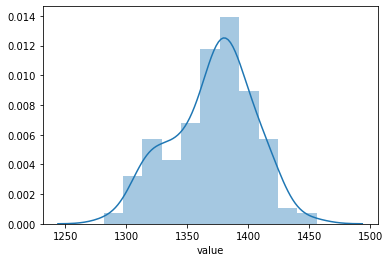

In [31]:
sns.distplot(daily_basal_energy_df['value'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


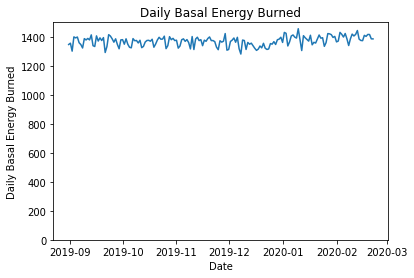

In [32]:
# plot daily basal energy burned -- pretty stable at around 1400
# and seems like since I started my daily workout (Ring Fit Adventure), my daily basal energy burned has increased
ax = sns.lineplot(data = daily_basal_energy_df, x = 'day', y = 'value')
ax.set_ylim([0, 1500])
ax.set_xlabel('Date')
ax.set_ylabel('Daily Basal Energy Burned')
ax.set_title('Daily Basal Energy Burned')
plt.show()

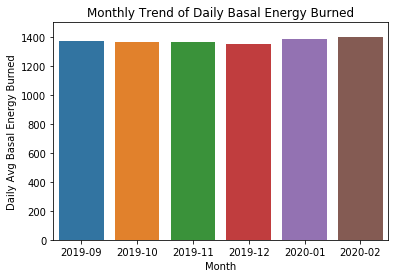

In [33]:
# let's see the monthly trend -- Jan and Feb do seem to be slightly higher than other months

monthly_basal_energy_df = daily_basal_energy_df.groupby('month')['value'].mean().reset_index()
ax = sns.barplot(data = monthly_basal_energy_df.iloc[1:,:], x = 'month', y = 'value')
ax.set_ylim([0, 1500])
ax.set_xlabel('Month')
ax.set_ylabel('Daily Avg Basal Energy Burned')
ax.set_title('Monthly Trend of Daily Basal Energy Burned')
plt.show()


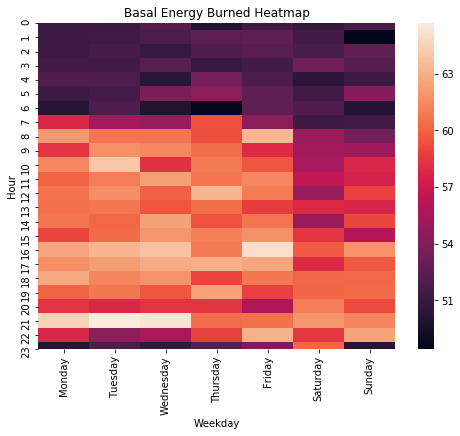

In [34]:
# how about basal energy burned by hours? Does it change by time of day and weekday?
# yes -- for basal energy burned, it's also higher during daytime and lower during sleeptime
# though we cannot see an obvious change during the workout time (20-22)
basal_energy_df['hour'] = basal_energy_df['startDate'].dt.hour
basal_energy_df['weekday'] = basal_energy_df['startDate'].dt.weekday_name
basal_energy_df['weekday'] = pd.Categorical(basal_energy_df['weekday'],
                                          categories=['Monday', 'Tuesday', 'Wednesday', 
                                                      'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                          ordered=True)
basal_energy_heatmap = basal_energy_df.groupby(['day','hour','weekday']).sum().reset_index().groupby(['hour','weekday']).mean().reset_index()
basal_energy_heatmap_plt = basal_energy_heatmap.pivot("hour", "weekday", "value")
fig = plt.figure(figsize=(8, 6))
ax = sns.heatmap(basal_energy_heatmap_plt)
ax.set_xlabel('Weekday')
ax.set_ylabel('Hour')
ax.set_title('Basal Energy Burned Heatmap')
plt.show()

### Question 4:  What is the trend of Active Energy Burned? How will workout time pop up?

My **Active Energy Burned** is more fluctuate than the **Basal Energy Burned**. The median daily active energy burned is 430, but standard deviation is as high as 106. But generally speaking, it's trending up month by month. Also, the Active Energy Burned is highest during my workout time (20-22 daily), higher during commute time, and lowest during sleep time.  

In [35]:
## data prep
active_energy_df['day'] = active_energy_df['startDate'].dt.date
active_energy_df['month'] = active_energy_df['startDate'].dt.to_period('M')
active_energy_df['hour'] = active_energy_df['startDate'].dt.hour
active_energy_df['weekday'] = active_energy_df['startDate'].dt.weekday_name
active_energy_df['weekday'] = pd.Categorical(active_energy_df['weekday'],
                                          categories=['Monday', 'Tuesday', 'Wednesday', 
                                                      'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                          ordered=True)

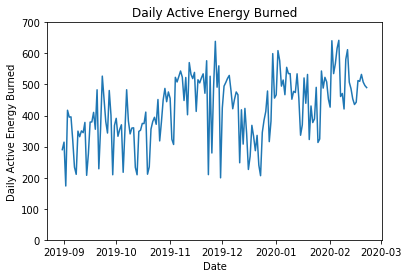

In [36]:
# daily active energy burned trend
daily_active_energy_df = active_energy_df.groupby(['month','day'])['value'].sum().reset_index()
daily_active_energy_df = daily_active_energy_df.iloc[1:-1,:]
daily_active_energy_df
ax = sns.lineplot(data = daily_active_energy_df, x = 'day', y = 'value')
ax.set_ylim([0, 700])
ax.set_xlabel('Date')
ax.set_ylabel('Daily Active Energy Burned')
ax.set_title('Daily Active Energy Burned')
plt.show()

In [37]:
daily_active_energy_df['value'].describe()

count    176.000000
mean     421.282585
std      106.108081
min      173.229000
25%      349.641750
50%      428.920000
75%      507.545000
max      642.170000
Name: value, dtype: float64

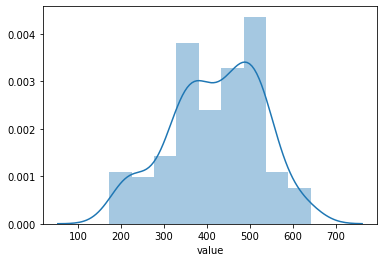

In [38]:
sns.distplot(daily_active_energy_df['value'])

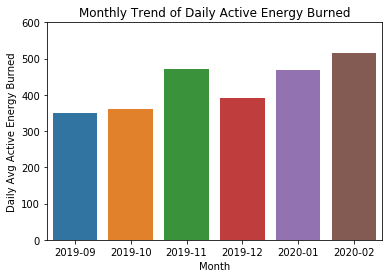

In [39]:
# monthly avg daily active energy burned
monthly_active_energy_df = daily_active_energy_df.groupby('month')['value'].mean().reset_index()
ax = sns.barplot(data = monthly_active_energy_df.iloc[1:,:], x = 'month', y = 'value')
ax.set_ylim([0, 600])
ax.set_xlabel('Month')
ax.set_ylabel('Daily Avg Active Energy Burned')
ax.set_title('Monthly Trend of Daily Active Energy Burned')
plt.show()

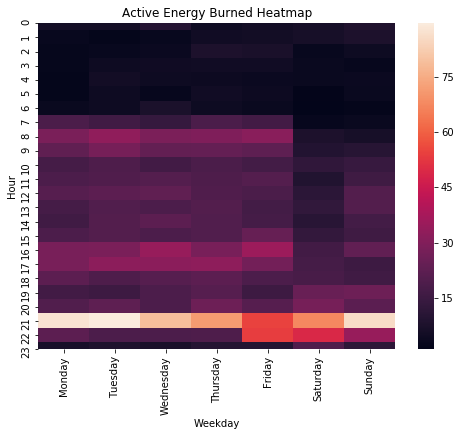

In [40]:
# active energy burned heatmap by hour and weekday
# the active energy burned during workout time (20-22) is obviously much higher than other time
# another pattern you can see is -- during commute time (week day ~8AM and 5PM), there is more active energy burned
active_energy_heatmap = active_energy_df.groupby(['day','hour','weekday']).sum().reset_index().groupby(['hour','weekday']).mean().reset_index()
active_energy_heatmap_plt = active_energy_heatmap.pivot("hour", "weekday", "value")
fig = plt.figure(figsize=(8, 6))
ax = sns.heatmap(active_energy_heatmap_plt)
ax.set_xlabel('Weekday')
ax.set_ylabel('Hour')
ax.set_title('Active Energy Burned Heatmap')
plt.show()

### Question 5:  Now let's look at total energy burned...

**Total Energy Burned** trend looks pretty similar to the **Active Energy Burned** trend, as the **Basal Energy Burned** trend is very flat. The variance mostly comes from the **Active Energy Burned**.

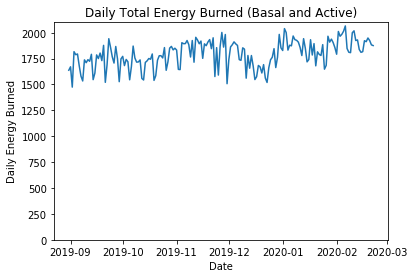

In [41]:
total_daily_energy = pd.merge(daily_basal_energy_df, daily_active_energy_df,
                             left_on = ['month', 'day'], right_on = ['month', 'day'])
total_daily_energy['total_energy'] = total_daily_energy['value_x'] + total_daily_energy['value_y']
ax = sns.lineplot(data = total_daily_energy, x = 'day', y = 'total_energy')
ax.set_ylim([0, 2100])
ax.set_xlabel('Date')
ax.set_ylabel('Daily Energy Burned')
ax.set_title('Daily Total Energy Burned (Basal and Active)')
plt.show()

In [42]:
total_daily_energy['total_energy'].describe()

count     176.000000
mean     1792.154403
std       129.691048
min      1474.652000
25%      1715.706500
50%      1794.537000
75%      1892.169000
max      2065.441000
Name: total_energy, dtype: float64

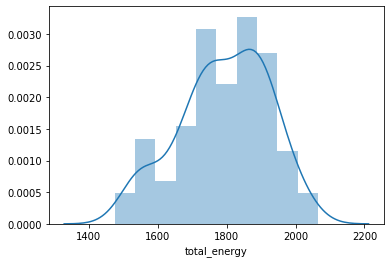

In [43]:
sns.distplot(total_daily_energy['total_energy'])